In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap

In [2]:
from src.PRIZM_classes import ZeroShotModellerModule, PlottingModule

In [3]:
import sys, importlib
importlib.reload(sys.modules['src.PRIZM_classes'])
from src.PRIZM_classes import ZeroShotModellerModule, PlottingModule

In [4]:
# Initialize PRIZM
model_list = ['ESM1b','ESM1v','ESM2','Progen2','ProtGPT2','RITA','Tranception','Tranception_no_ret','UniRep', #Sequence
              'EVE','eUniRep','TranceptEVE', #MSA
              'ESM-IF1','ProteinMPNN'] #Structure
zsm_module = ZeroShotModellerModule('src/model_config.yaml')
zsmplt = PlottingModule()

In [5]:
n_bootstrap = 1
cmap = LinearSegmentedColormap.from_list("custom_diverging", ['#516f84', 'white', '#df9966'])
best_color = '#df9966'
worst_color = '#516f84'

# Activity Validation

## Initialize Data

In [6]:
zsm_module.set_threshold('ANCSZ_Hobbs_2022',-0.0574121626)
zsm_module.set_threshold('ANCSZ_Hobbs_2022_selection',-0.0574121626)
zsm_module.set_threshold('Q59976_STRSQ_Romero_2015',-1.0)
zsm_module.set_threshold('Q59976_STRSQ_Romero_2015_selection',-1.0)
zsm_module.set_threshold('VKOR1_HUMAN_Chiasson_2020_activity_selection',0.7)
zsm_module.set_threshold('VKOR1_HUMAN_Chiasson_2020_activity',0.7)
zsm_module.load_scores('ANCSZ_Hobbs_2022',model_list=model_list)
zsm_module.load_scores('ANCSZ_Hobbs_2022_selection',wt=True,model_list=model_list)
zsm_module.load_scores('Q59976_STRSQ_Romero_2015',model_list=model_list)
zsm_module.load_scores('Q59976_STRSQ_Romero_2015_selection',wt=True,model_list=model_list)
zsm_module.load_scores('VKOR1_HUMAN_Chiasson_2020_activity',model_list=model_list)
zsm_module.load_scores('VKOR1_HUMAN_Chiasson_2020_activity_selection',wt=True,model_list=model_list)

## Process Datasets

In [7]:
zsm_module.compute_metrics_iterations('ANCSZ_Hobbs_2022_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])
zsm_module.compute_metrics_iterations('Q59976_STRSQ_Romero_2015_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])
zsm_module.compute_metrics_iterations('VKOR1_HUMAN_Chiasson_2020_activity_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])

zsm_module.compute_metrics('ANCSZ_Hobbs_2022',n_bootstrap=n_bootstrap, metrics = ['spearmanr','hit_rate','average_precision'],previous_metrics=zsm_module.metric_results['ANCSZ_Hobbs_2022_selection'])
zsm_module.compute_metrics('Q59976_STRSQ_Romero_2015',n_bootstrap=n_bootstrap, metrics = ['spearmanr','hit_rate','average_precision'],previous_metrics=zsm_module.metric_results['Q59976_STRSQ_Romero_2015_selection'])
zsm_module.compute_metrics('VKOR1_HUMAN_Chiasson_2020_activity',n_bootstrap=n_bootstrap, metrics = ['spearmanr','hit_rate','average_precision'],previous_metrics=zsm_module.metric_results['VKOR1_HUMAN_Chiasson_2020_activity_selection'])

In [8]:
zsm_module.process_models_iteration('ANCSZ_Hobbs_2022_selection')
zsm_module.process_models('ANCSZ_Hobbs_2022')

zsm_module.process_models_iteration('Q59976_STRSQ_Romero_2015_selection')
zsm_module.process_models('Q59976_STRSQ_Romero_2015')

zsm_module.process_models_iteration('VKOR1_HUMAN_Chiasson_2020_activity_selection')
zsm_module.process_models('VKOR1_HUMAN_Chiasson_2020_activity')

## Plotting

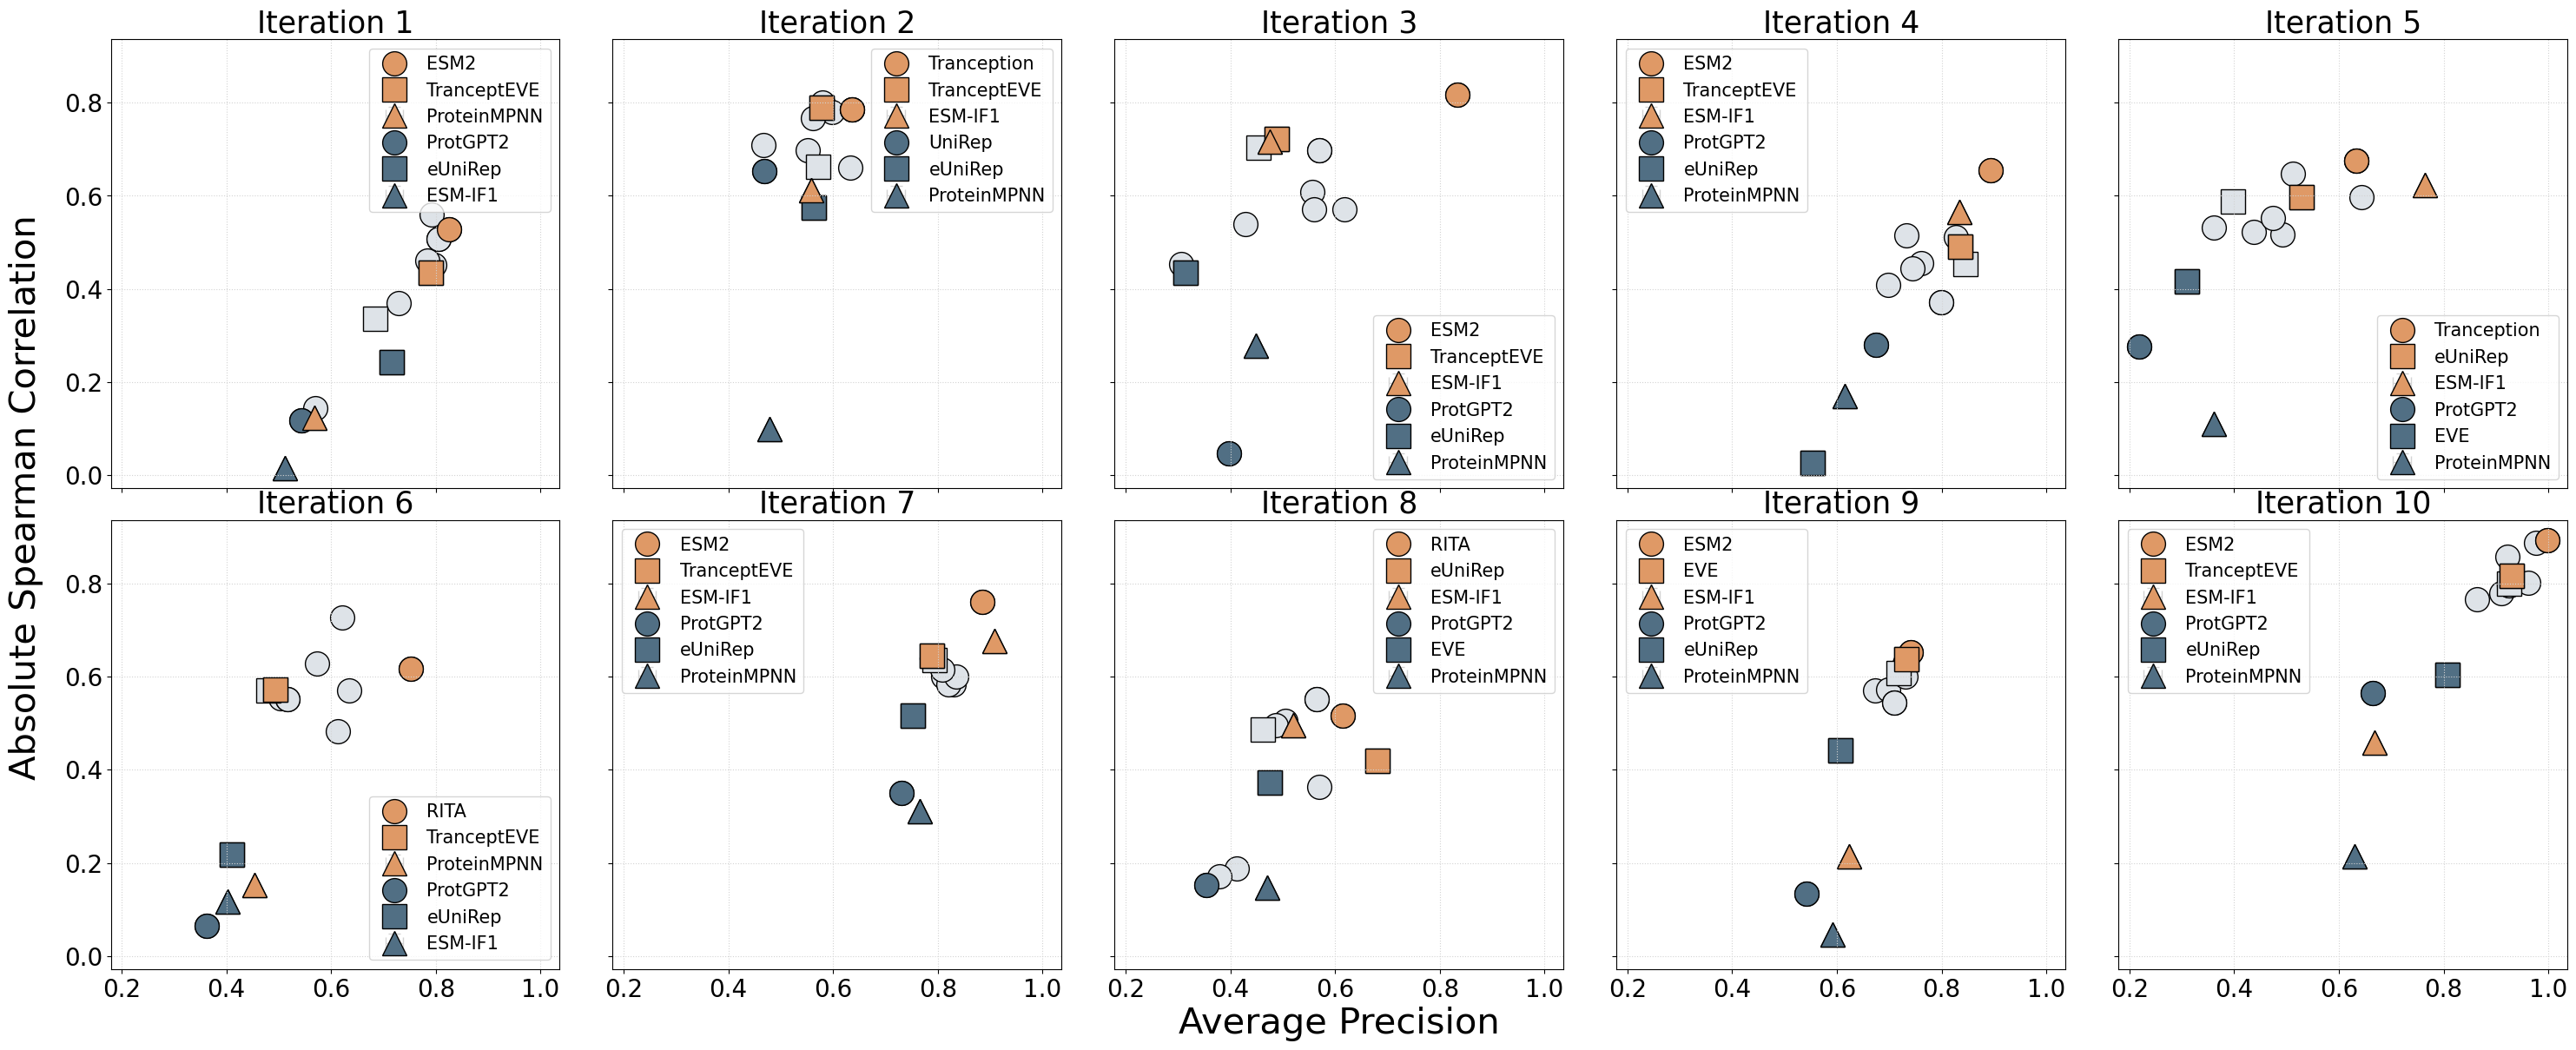

In [9]:
zsmplt.metrics_cat_iteration(zsm_module, 'ANCSZ_Hobbs_2022_selection')

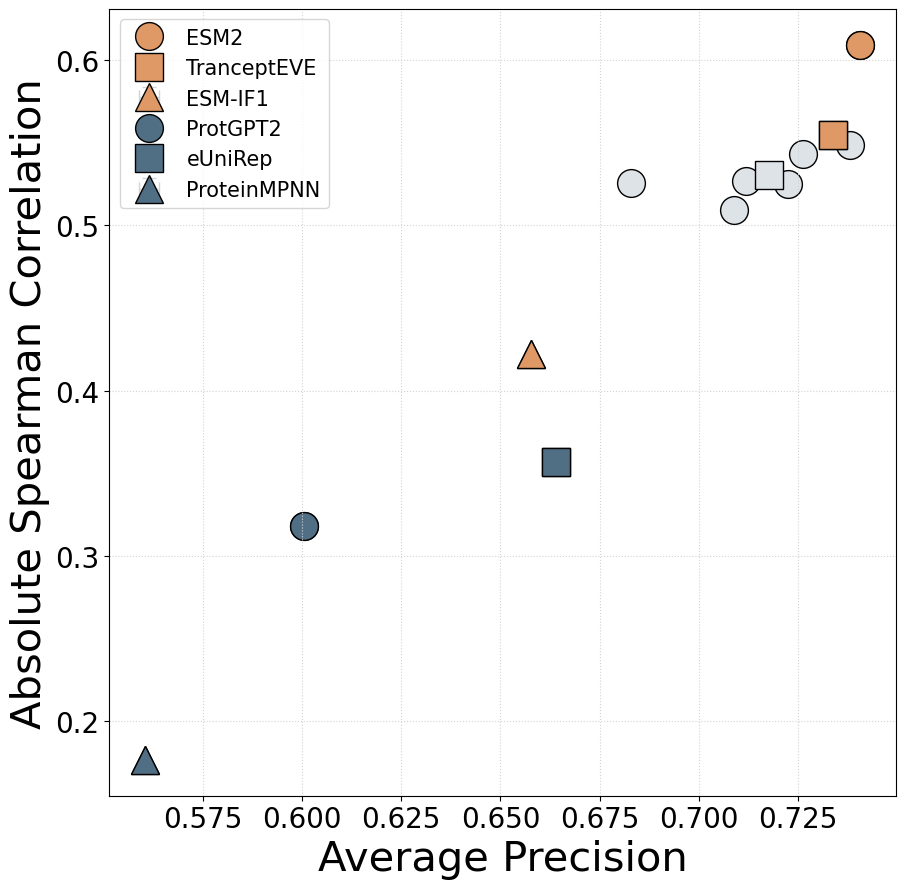

In [10]:
zsmplt.metrics_cat(zsm_module, 'ANCSZ_Hobbs_2022')

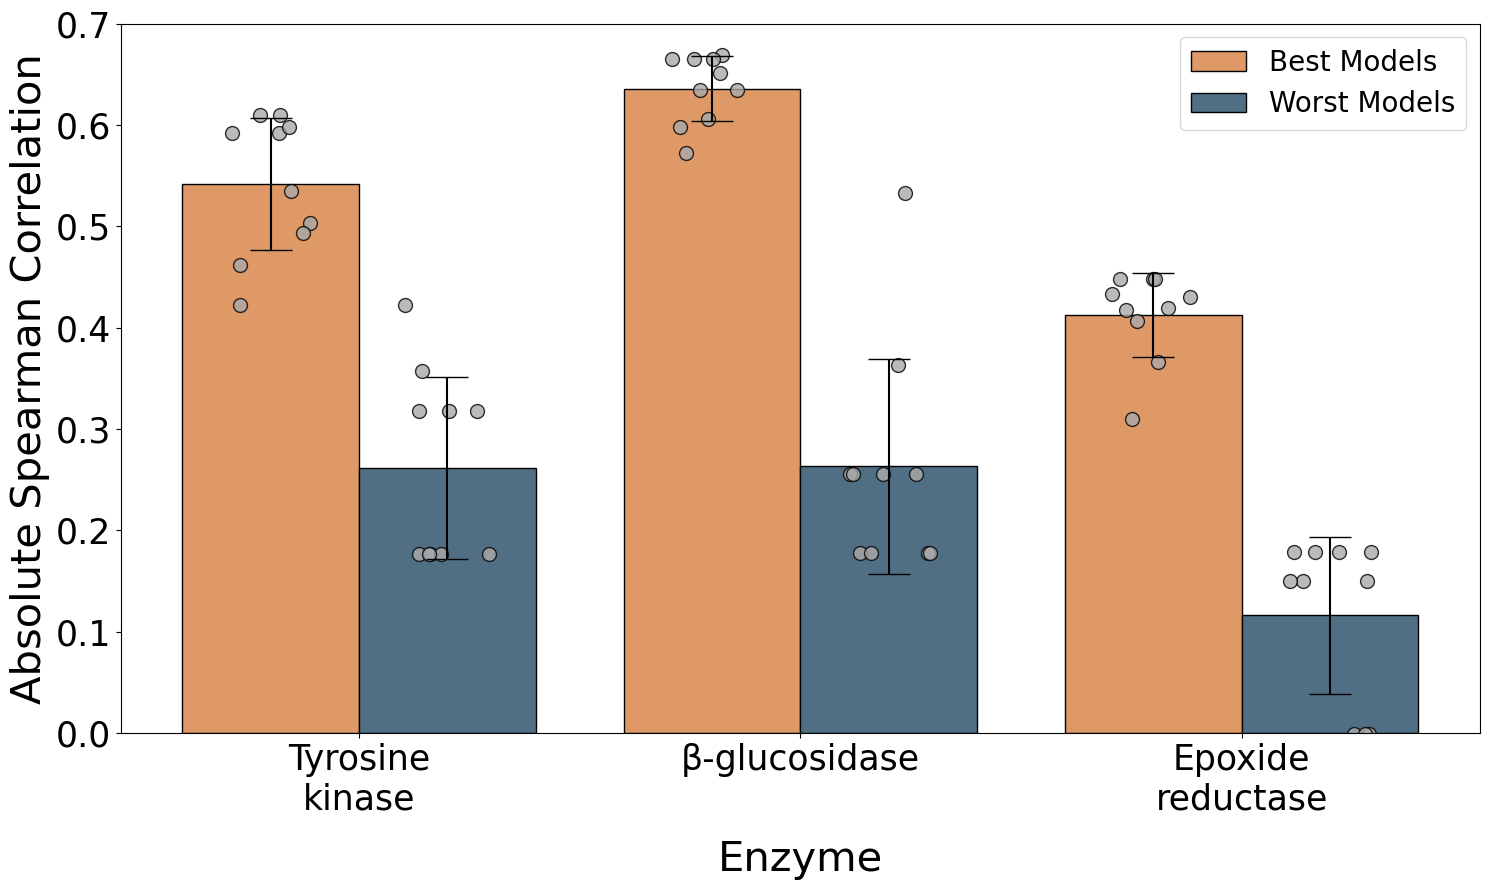

In [11]:
zsmplt.bar_metrics(zsm_module,dataset_names = ['ANCSZ_Hobbs_2022','Q59976_STRSQ_Romero_2015','VKOR1_HUMAN_Chiasson_2020_activity'],
                    metric = 'spearmanr',xlabel='Enzyme',ylabel='Absolute Spearman Correlation',
                    alternative_names=['Tyrosine\nkinase','β-glucosidase','Epoxide\nreductase'],
                    ylimit=0.7, figsize=(15,9), format='svg')

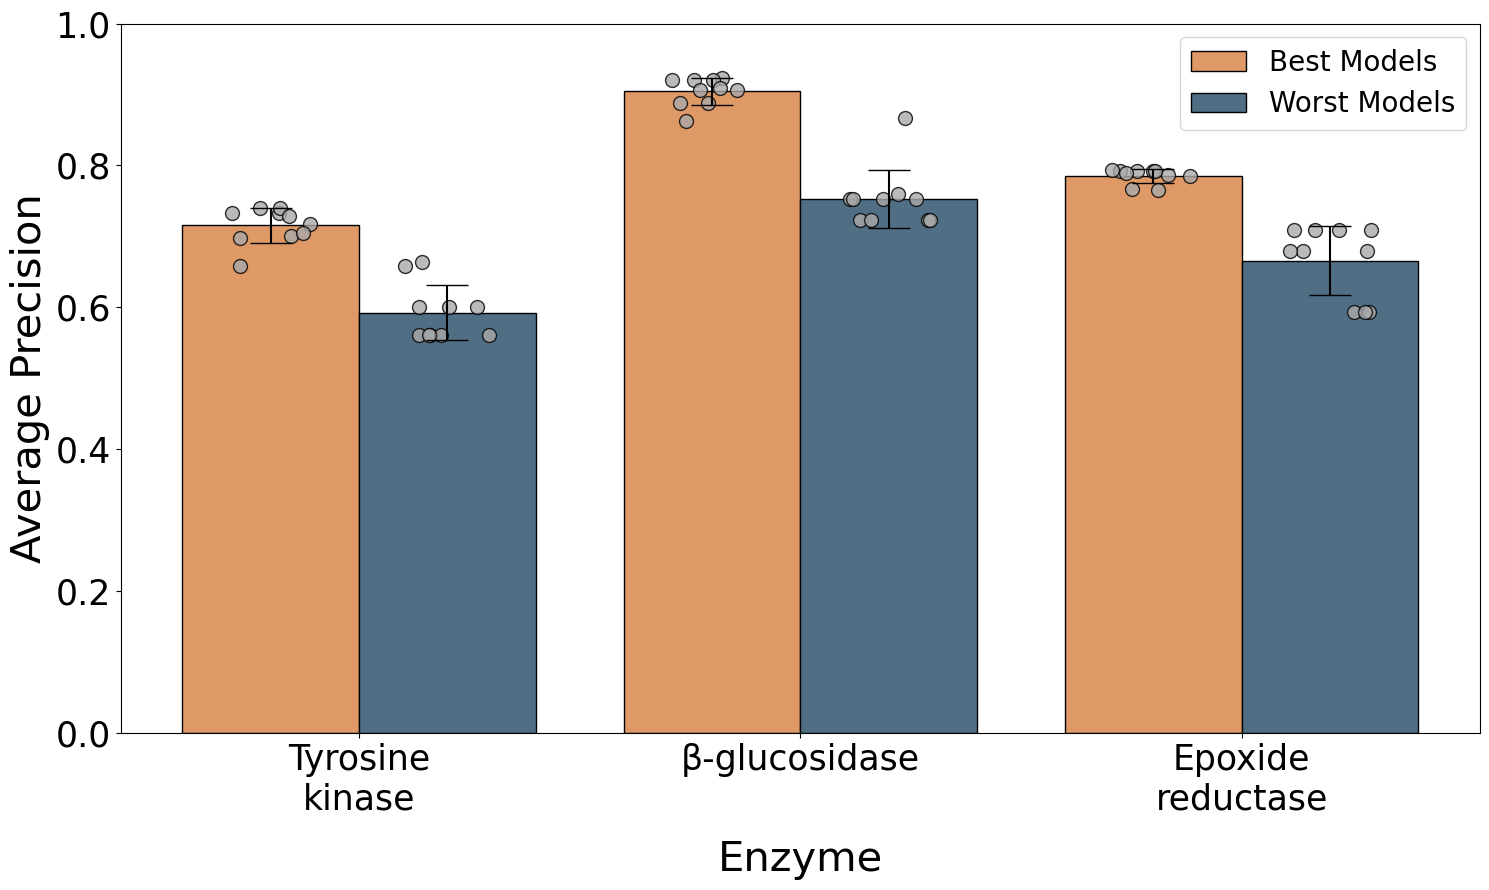

In [12]:
zsmplt.bar_metrics(zsm_module,dataset_names = ['ANCSZ_Hobbs_2022','Q59976_STRSQ_Romero_2015','VKOR1_HUMAN_Chiasson_2020_activity'],
                    metric = 'average_precision',xlabel='Enzyme',ylabel='Average Precision',
                    alternative_names=['Tyrosine\nkinase','β-glucosidase','Epoxide\nreductase'],
                    ylimit=1, figsize=(15,9), format='svg')

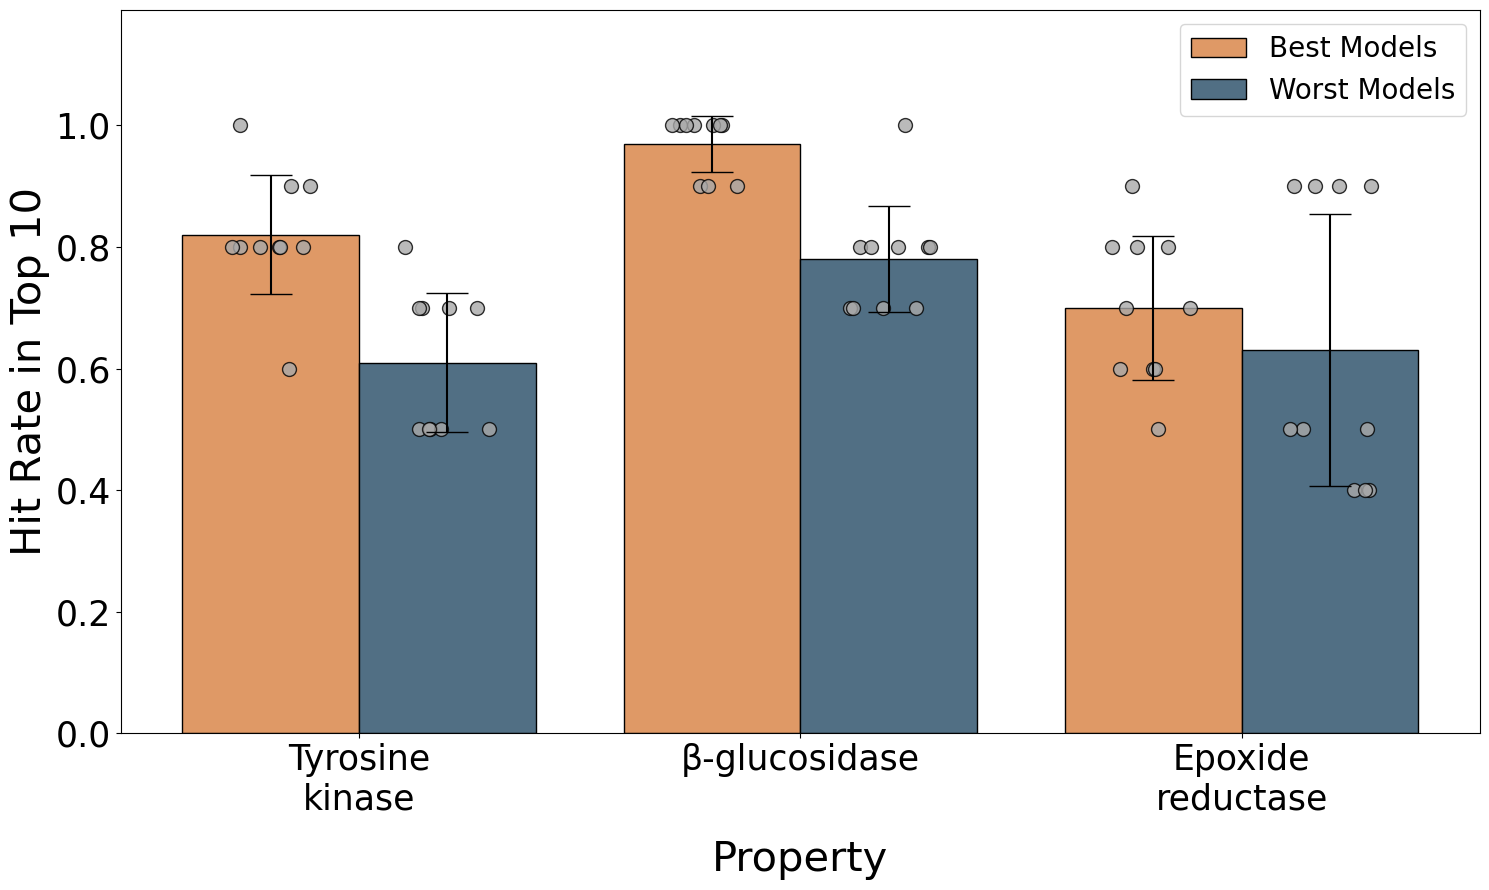

In [13]:
zsmplt.bar_metrics(zsm_module,dataset_names = ['ANCSZ_Hobbs_2022','Q59976_STRSQ_Romero_2015','VKOR1_HUMAN_Chiasson_2020_activity'],
                    metric = 'hit_rate',xlabel='Property',ylabel='Hit Rate in Top 10',
                    alternative_names=['Tyrosine\nkinase','β-glucosidase','Epoxide\nreductase'],
                    ylimit=1.19, figsize=(15,9))

## Model Heatmap

In [14]:
n_models = len(model_list)
best_model_mat = np.zeros((3,len(model_list)))
worst_model_mat = np.zeros((3,len(model_list)))
for n, dataset_name in enumerate(['ANCSZ_Hobbs_2022_selection','Q59976_STRSQ_Romero_2015_selection','VKOR1_HUMAN_Chiasson_2020_activity_selection']):
    for i, model in enumerate(model_list):
        for ite in range(10):
            best_ = zsm_module.best_models[dataset_name][f'ite{ite}']['overall']
            worst_ = zsm_module.worst_models[dataset_name][f'ite{ite}']['overall']
            if model == 'Trancept_no_ret':
                if 'Tranception_no_ret' in best_:
                    best_model_mat[n][i] += 1
                if 'Tranception_no_ret' in worst_:
                    worst_model_mat[n][i] += 1
            else:
                if model in best_:
                    best_model_mat[n][i] += 1
                if model in worst_:
                    worst_model_mat[n][i] += 1

In [15]:
print('Best Overall Models')
for dataset_name in ['ANCSZ_Hobbs_2022','Q59976_STRSQ_Romero_2015','VKOR1_HUMAN_Chiasson_2020_activity']:
    print(dataset_name)
    print(' ',zsm_module.best_models[dataset_name]['overall'])
print('\n')
print('Worst Overall Models')
for dataset_name in ['ANCSZ_Hobbs_2022','Q59976_STRSQ_Romero_2015','VKOR1_HUMAN_Chiasson_2020_activity']:
    print(dataset_name)
    print(' ',zsm_module.worst_models[dataset_name]['overall'])

Best Overall Models
ANCSZ_Hobbs_2022
  ESM2_650M
Q59976_STRSQ_Romero_2015
  Progen2_large
VKOR1_HUMAN_Chiasson_2020_activity
  ESM1v


Worst Overall Models
ANCSZ_Hobbs_2022
  ProteinMPNN
Q59976_STRSQ_Romero_2015
  ProteinMPNN
VKOR1_HUMAN_Chiasson_2020_activity
  UniRep


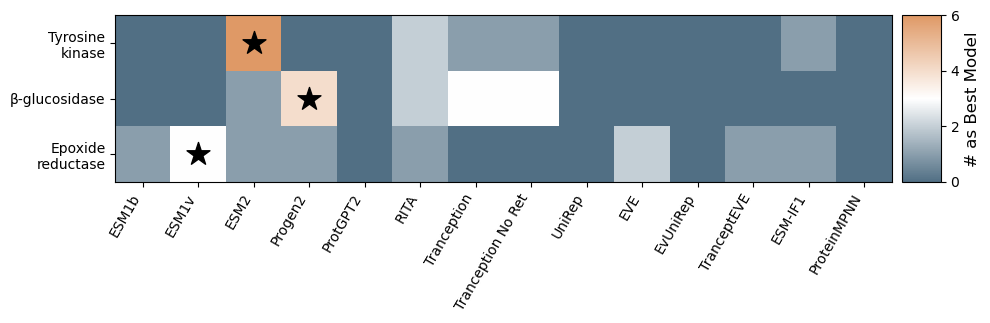

In [16]:
# Initialize the figure and plot the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.matshow(best_model_mat, cmap=cmap)

# Set tick parameters
ax.set_xticks(range(n_models))
ax.set_xticklabels(['ESM1b',
 'ESM1v',
 'ESM2',
 'Progen2',
 'ProtGPT2',
 'RITA',
 'Tranception',
 'Tranception No Ret',
 'UniRep',
 'EVE',
 'EvUniRep',
 'TranceptEVE',
 'ESM-IF1',
 'ProteinMPNN'], rotation=60, fontsize=10, ha='right')
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
ax.set_yticks(range(3))
ax.set_yticklabels([
'Tyrosine\nkinase','β-glucosidase','Epoxide\nreductase'
], fontsize=10)

# Create a colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('# as Best Model', fontsize=12)

# Add scatter points for best models for entire DMS dataset
scatter_x = [2, 3, 1]
scatter_y = [0, 1, 2]
ax.scatter(scatter_x, scatter_y, color='k', marker='*', s=300, label="Best Models")

plt.tight_layout()
plt.show()

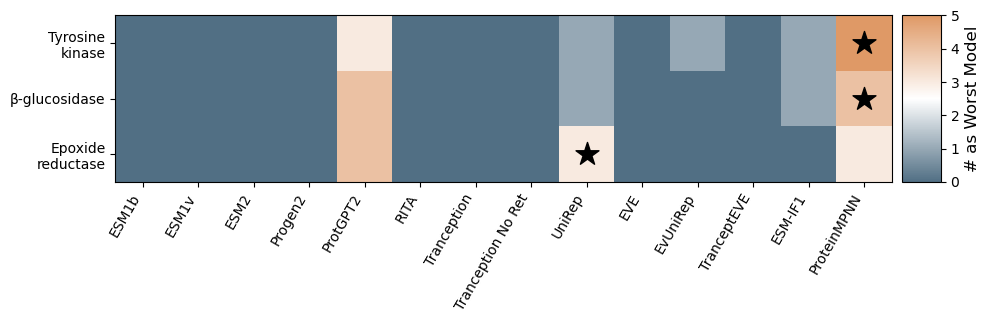

In [17]:
# Initialize the figure and plot the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.matshow(worst_model_mat, cmap=cmap)

# Set tick parameters
ax.set_xticks(range(n_models))
ax.set_xticklabels(['ESM1b',
 'ESM1v',
 'ESM2',
 'Progen2',
 'ProtGPT2',
 'RITA',
 'Tranception',
 'Tranception No Ret',
 'UniRep',
 'EVE',
 'EvUniRep',
 'TranceptEVE',
 'ESM-IF1',
 'ProteinMPNN'], rotation=60, fontsize=10, ha='right')
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
ax.set_yticks(range(3))
ax.set_yticklabels([
'Tyrosine\nkinase','β-glucosidase','Epoxide\nreductase'
], fontsize=10)

# Create a colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('# as Worst Model', fontsize=12)

# Add scatter points for best models for entire DMS dataset
scatter_x = [13,13,8]
scatter_y = [0,1,2]
ax.scatter(scatter_x, scatter_y, color='k', marker='*', s=300, label="Best Models")

plt.tight_layout()
plt.show()

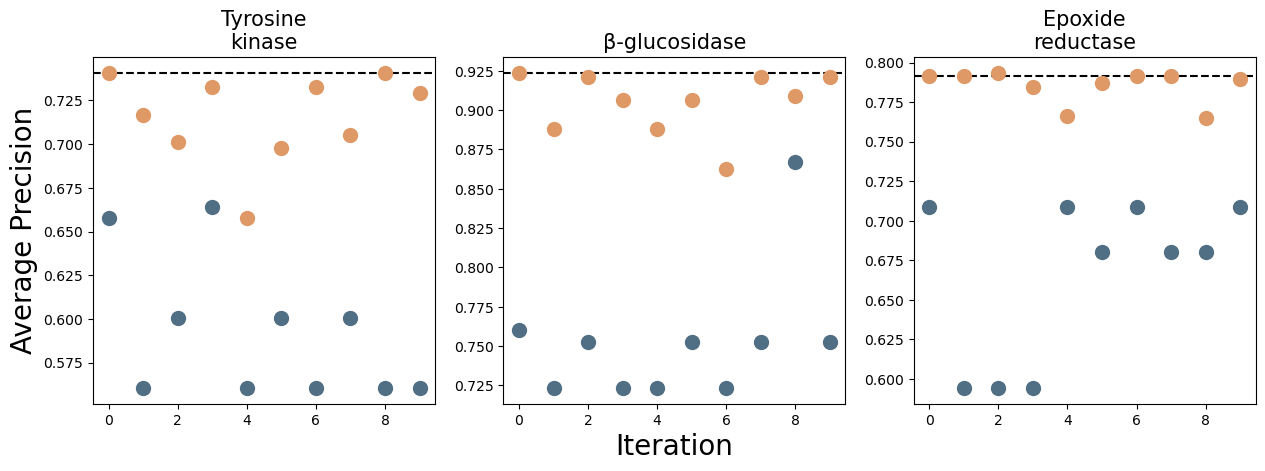

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15, 4.5))
for ax,name,title in zip(axes.flatten(),['ANCSZ_Hobbs_2022','Q59976_STRSQ_Romero_2015','VKOR1_HUMAN_Chiasson_2020_activity'],
                                               ['Tyrosine\nkinase','β-glucosidase','Epoxide\nreductase']):
    ax.set_title(title,fontsize=15)
    best_m_full = zsm_module.best_models[name]['overall']
    ax.axhline(zsm_module.metric_results[name]['average_precision']['avg'][best_m_full], color='k', linestyle='--')
    for i in range(10):
        best_m = zsm_module.best_models[name+'_selection'][f'ite{i}']['overall']
        worst_m = zsm_module.worst_models[name+'_selection'][f'ite{i}']['overall']
        best_met = zsm_module.metric_results[name]['average_precision']['avg'][best_m]
        best_met_std = zsm_module.metric_results[name]['average_precision']['std'][best_m]
        worst_met = zsm_module.metric_results[name]['average_precision']['avg'][worst_m]
        worst_met_std = zsm_module.metric_results[name]['average_precision']['std'][worst_m]
        ax.errorbar(i, best_met, yerr=best_met_std, fmt='o', color=best_color,capsize=5,markersize=10)
        ax.errorbar(i, worst_met, yerr=worst_met_std, fmt='o', color=worst_color,capsize=5,markersize=10)
axes[1].set_xlabel('Iteration', fontsize = 20)
axes[0].set_ylabel('Average Precision', fontsize = 20)

plt.show()

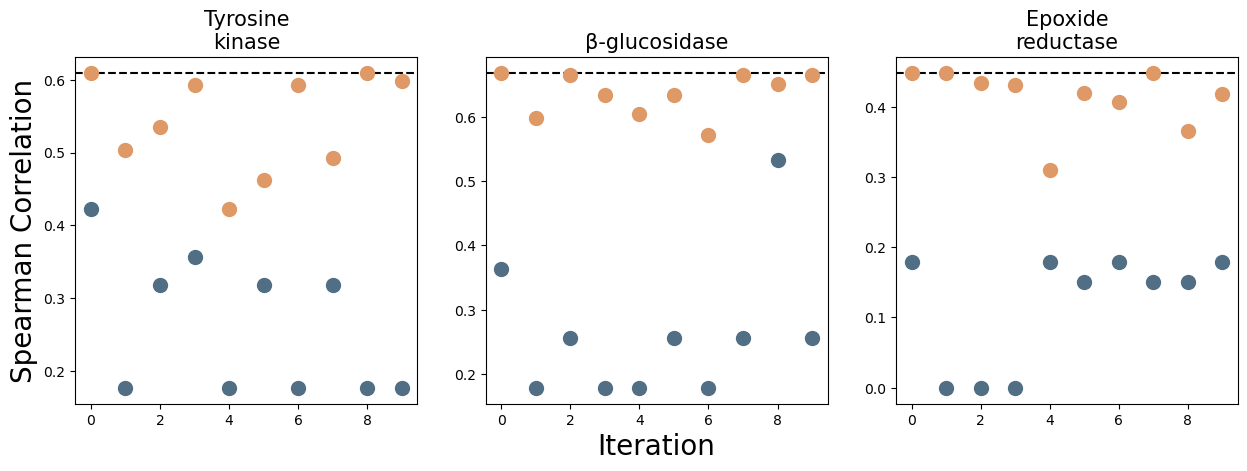

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15, 4.5))
for ax,name,title in zip(axes.flatten(),['ANCSZ_Hobbs_2022','Q59976_STRSQ_Romero_2015','VKOR1_HUMAN_Chiasson_2020_activity'],
                                               ['Tyrosine\nkinase','β-glucosidase','Epoxide\nreductase']):
    ax.set_title(title,fontsize=15)
    best_m_full = zsm_module.best_models[name]['overall']
    ax.axhline(zsm_module.metric_results[name]['spearmanr']['avg'][best_m_full], color='k', linestyle='--')
    for i in range(10):
        best_m = zsm_module.best_models[name+'_selection'][f'ite{i}']['overall']
        worst_m = zsm_module.worst_models[name+'_selection'][f'ite{i}']['overall']
        best_met = zsm_module.metric_results[name]['spearmanr']['avg'][best_m]
        best_met_std = zsm_module.metric_results[name]['spearmanr']['std'][best_m]
        worst_met = zsm_module.metric_results[name]['spearmanr']['avg'][worst_m]
        worst_met_std = zsm_module.metric_results[name]['spearmanr']['std'][worst_m]
        ax.errorbar(i, best_met, yerr=best_met_std, fmt='o', color=best_color,capsize=5,markersize=10)
        ax.errorbar(i, worst_met, yerr=worst_met_std, fmt='o', color=worst_color,capsize=5,markersize=10)
axes[1].set_xlabel('Iteration', fontsize = 20)
axes[0].set_ylabel('Spearman Correlation', fontsize = 20)

plt.show()

# Diversity Validation

## Initialize Data

In [20]:
zsm_module.set_threshold('A4_HUMAN_Seuma_2022_selection',-2.000000)
zsm_module.set_threshold('ADRB2_HUMAN_Jones_2020_selection',1.859962)
zsm_module.set_threshold('ESTA_BACSU_Nutschel_2020_selection',46.340000)
zsm_module.set_threshold('MK01_HUMAN_Brenan_2016_selection',-8.040791)
zsm_module.set_threshold('SC6A4_HUMAN_Young_2021_selection',-0.156069)
zsm_module.set_threshold('SPIKE_SARS2_Starr_2020_binding_selection',-0.500000)
zsm_module.set_threshold('YAP1_HUMAN_Araya_2012_selection',0.623640)
zsm_module.set_threshold('A4_HUMAN_Seuma_2022_single_selection',-2.000000)
zsm_module.set_threshold('YAP1_HUMAN_Araya_2012_single_selection',0.623640)

In [21]:
zsm_module.set_threshold('A4_HUMAN_Seuma_2022',-2.000000)
zsm_module.set_threshold('A4_HUMAN_Seuma_2022_single',-2.000000)
zsm_module.set_threshold('ADRB2_HUMAN_Jones_2020',1.859962)
zsm_module.set_threshold('ESTA_BACSU_Nutschel_2020',46.340000)
zsm_module.set_threshold('MK01_HUMAN_Brenan_2016',-8.040791)
zsm_module.set_threshold('SC6A4_HUMAN_Young_2021',-0.156069)
zsm_module.set_threshold('SPIKE_SARS2_Starr_2020_binding',-0.500000)
zsm_module.set_threshold('YAP1_HUMAN_Araya_2012',0.623640)
zsm_module.set_threshold('YAP1_HUMAN_Araya_2012_single',0.623640)

In [22]:
zsm_module.load_scores('A4_HUMAN_Seuma_2022_selection',wt=True,model_list=model_list)
zsm_module.load_scores('ADRB2_HUMAN_Jones_2020_selection',wt=True,model_list=model_list)
zsm_module.load_scores('ESTA_BACSU_Nutschel_2020_selection',wt=True,model_list=model_list)
zsm_module.load_scores('MK01_HUMAN_Brenan_2016_selection',wt=True,model_list=model_list)
zsm_module.load_scores('SC6A4_HUMAN_Young_2021_selection',wt=True,model_list=model_list)
zsm_module.load_scores('SPIKE_SARS2_Starr_2020_binding_selection',wt=True,model_list=model_list)
zsm_module.load_scores('YAP1_HUMAN_Araya_2012_selection',wt=True,model_list=model_list)
zsm_module.load_scores('A4_HUMAN_Seuma_2022_single_selection',wt=True,model_list=model_list)
zsm_module.load_scores('YAP1_HUMAN_Araya_2012_single_selection',wt=True,model_list=model_list)

In [23]:
zsm_module.load_scores('A4_HUMAN_Seuma_2022',wt=True,model_list=model_list)
zsm_module.load_scores('A4_HUMAN_Seuma_2022',wt=True,model_list=model_list,dict_name='A4_HUMAN_Seuma_2022_single')
zsm_module.load_scores('ADRB2_HUMAN_Jones_2020',wt=True,model_list=model_list)
zsm_module.load_scores('ESTA_BACSU_Nutschel_2020',wt=True,model_list=model_list)
zsm_module.load_scores('MK01_HUMAN_Brenan_2016',wt=True,model_list=model_list)
zsm_module.load_scores('SC6A4_HUMAN_Young_2021',wt=True,model_list=model_list)
zsm_module.load_scores('SPIKE_SARS2_Starr_2020_binding',wt=True,model_list=model_list)
zsm_module.load_scores('YAP1_HUMAN_Araya_2012',wt=True,model_list=model_list)
zsm_module.load_scores('YAP1_HUMAN_Araya_2012',wt=True,model_list=model_list,dict_name='YAP1_HUMAN_Araya_2012_single')

## Process Datasets

In [24]:
zsm_module.compute_metrics_iterations('A4_HUMAN_Seuma_2022_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])
zsm_module.compute_metrics_iterations('ADRB2_HUMAN_Jones_2020_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])
zsm_module.compute_metrics_iterations('ESTA_BACSU_Nutschel_2020_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])
zsm_module.compute_metrics_iterations('MK01_HUMAN_Brenan_2016_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])
zsm_module.compute_metrics_iterations('SC6A4_HUMAN_Young_2021_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])
zsm_module.compute_metrics_iterations('SPIKE_SARS2_Starr_2020_binding_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])
zsm_module.compute_metrics_iterations('YAP1_HUMAN_Araya_2012_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])
zsm_module.compute_metrics_iterations('A4_HUMAN_Seuma_2022_single_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])
zsm_module.compute_metrics_iterations('YAP1_HUMAN_Araya_2012_single_selection',n_bootstrap=n_bootstrap,metrics=['spearmanr','hit_rate','average_precision'])

In [25]:
zsm_module.compute_metrics('A4_HUMAN_Seuma_2022',n_bootstrap=n_bootstrap, metrics = ['spearmanr', 'average_precision','hit_rate'],previous_metrics=zsm_module.metric_results['A4_HUMAN_Seuma_2022_selection'])
zsm_module.compute_metrics('A4_HUMAN_Seuma_2022_single',n_bootstrap=n_bootstrap, metrics = ['spearmanr', 'average_precision','hit_rate'],previous_metrics=zsm_module.metric_results['A4_HUMAN_Seuma_2022_single_selection'])
zsm_module.compute_metrics('ADRB2_HUMAN_Jones_2020',n_bootstrap=n_bootstrap, metrics = ['spearmanr', 'average_precision','hit_rate'],previous_metrics=zsm_module.metric_results['ADRB2_HUMAN_Jones_2020_selection'])
zsm_module.compute_metrics('ESTA_BACSU_Nutschel_2020',n_bootstrap=n_bootstrap, metrics = ['spearmanr', 'average_precision','hit_rate'],previous_metrics=zsm_module.metric_results['ESTA_BACSU_Nutschel_2020_selection'])
zsm_module.compute_metrics('MK01_HUMAN_Brenan_2016',n_bootstrap=n_bootstrap, metrics = ['spearmanr', 'average_precision','hit_rate'],previous_metrics=zsm_module.metric_results['MK01_HUMAN_Brenan_2016_selection'])
zsm_module.compute_metrics('SC6A4_HUMAN_Young_2021',n_bootstrap=n_bootstrap, metrics = ['spearmanr', 'average_precision','hit_rate'],previous_metrics=zsm_module.metric_results['SC6A4_HUMAN_Young_2021_selection'])
zsm_module.compute_metrics('SPIKE_SARS2_Starr_2020_binding',n_bootstrap=n_bootstrap, metrics = ['spearmanr', 'average_precision','hit_rate'],previous_metrics=zsm_module.metric_results['SPIKE_SARS2_Starr_2020_binding_selection'])
zsm_module.compute_metrics('YAP1_HUMAN_Araya_2012',n_bootstrap=n_bootstrap, metrics = ['spearmanr', 'average_precision','hit_rate'],previous_metrics=zsm_module.metric_results['YAP1_HUMAN_Araya_2012_selection'])
zsm_module.compute_metrics('YAP1_HUMAN_Araya_2012_single',n_bootstrap=n_bootstrap, metrics = ['spearmanr', 'average_precision','hit_rate'],previous_metrics=zsm_module.metric_results['YAP1_HUMAN_Araya_2012_single_selection'])

In [26]:
zsm_module.process_models_iteration('A4_HUMAN_Seuma_2022_selection')
zsm_module.process_models_iteration('ADRB2_HUMAN_Jones_2020_selection')
zsm_module.process_models_iteration('ESTA_BACSU_Nutschel_2020_selection')
zsm_module.process_models_iteration('MK01_HUMAN_Brenan_2016_selection')
zsm_module.process_models_iteration('SC6A4_HUMAN_Young_2021_selection')
zsm_module.process_models_iteration('SPIKE_SARS2_Starr_2020_binding_selection')
zsm_module.process_models_iteration('YAP1_HUMAN_Araya_2012_selection')
zsm_module.process_models_iteration('A4_HUMAN_Seuma_2022_single_selection')
zsm_module.process_models_iteration('YAP1_HUMAN_Araya_2012_single_selection')

In [27]:
zsm_module.process_models('A4_HUMAN_Seuma_2022')
zsm_module.process_models('A4_HUMAN_Seuma_2022_single')
zsm_module.process_models('ADRB2_HUMAN_Jones_2020')
zsm_module.process_models('ESTA_BACSU_Nutschel_2020')
zsm_module.process_models('MK01_HUMAN_Brenan_2016')
zsm_module.process_models('SC6A4_HUMAN_Young_2021')
zsm_module.process_models('SPIKE_SARS2_Starr_2020_binding')
zsm_module.process_models('YAP1_HUMAN_Araya_2012')
zsm_module.process_models('YAP1_HUMAN_Araya_2012_single')

## Plotting

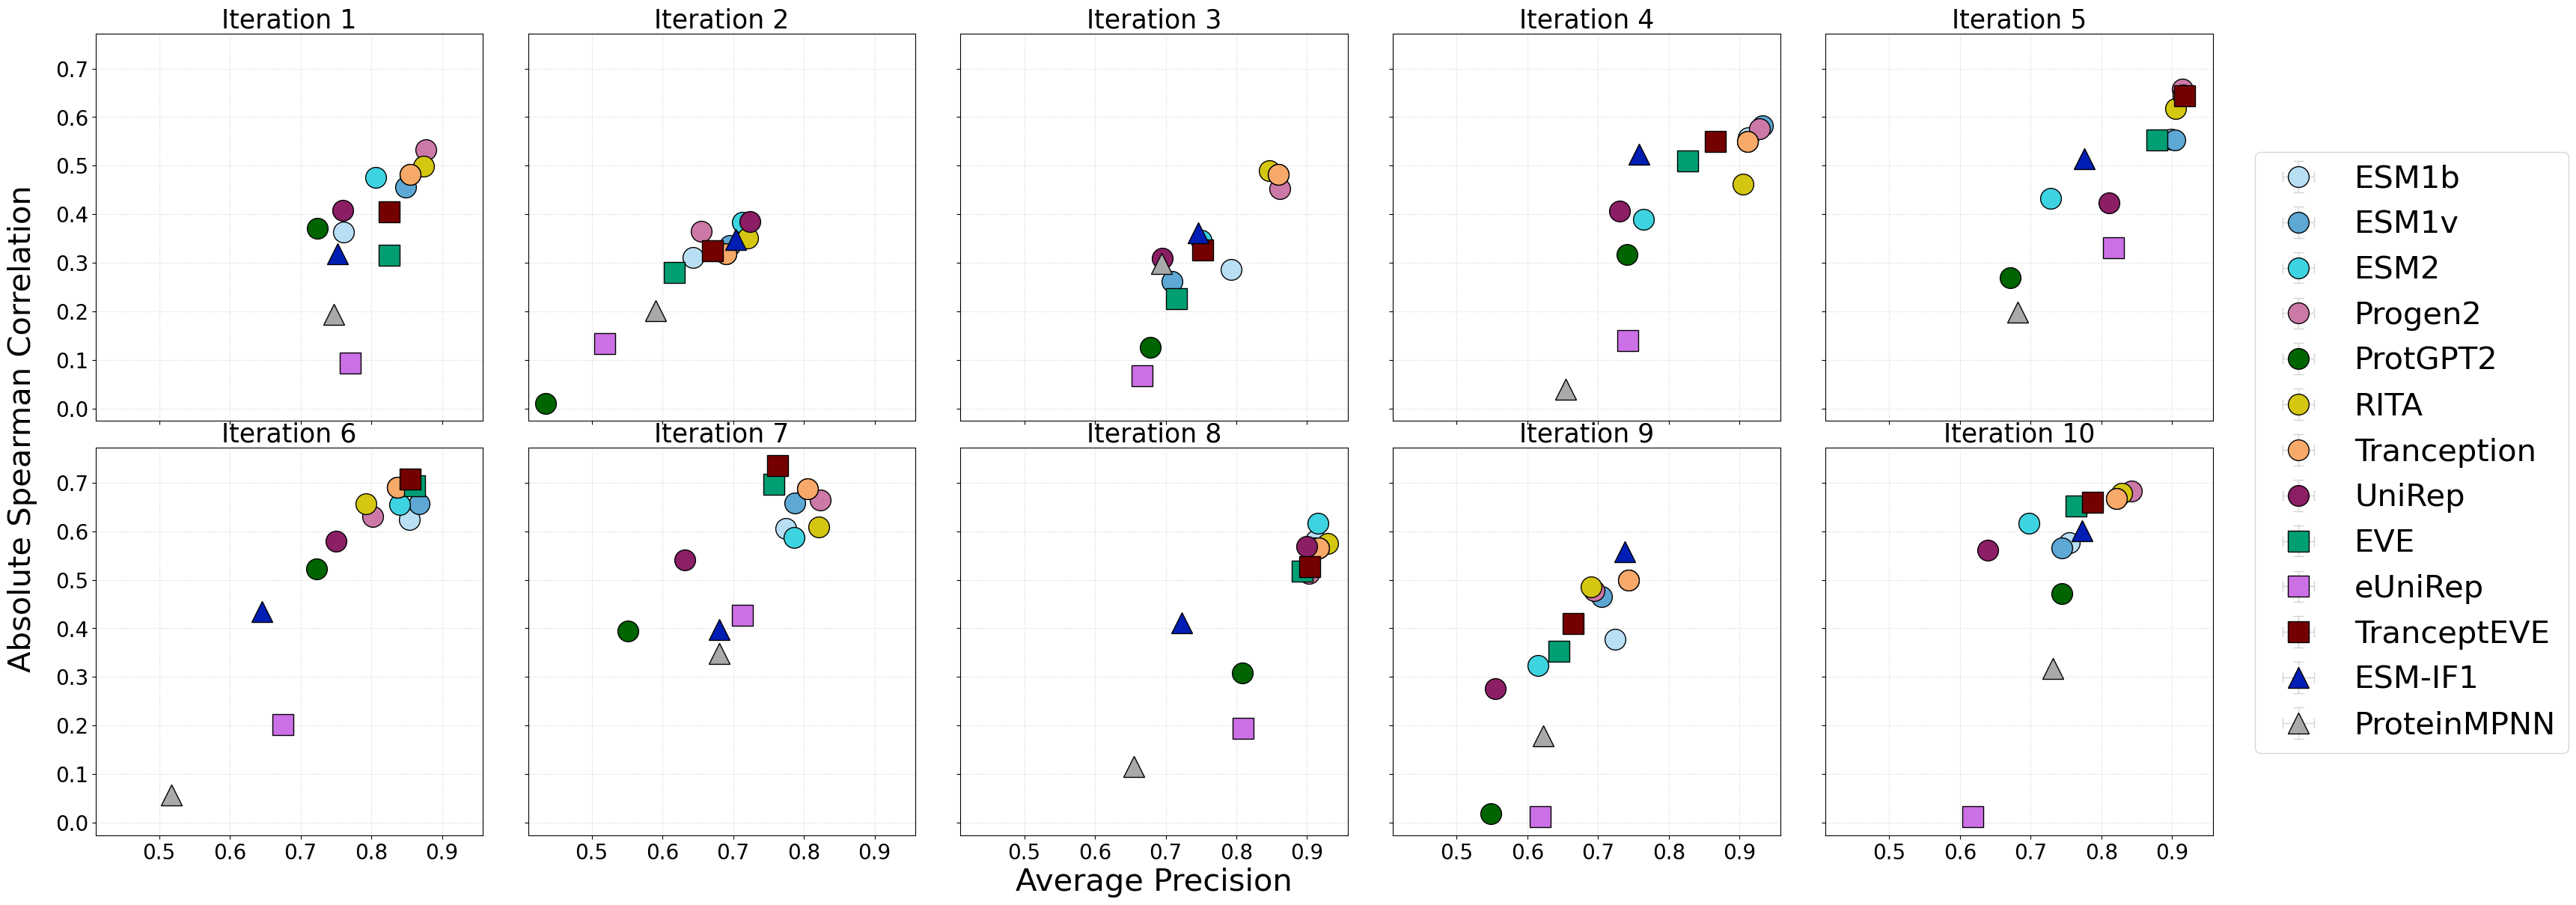

In [28]:
zsmplt.metrics_iteration(zsm_module, 'ADRB2_HUMAN_Jones_2020_selection')

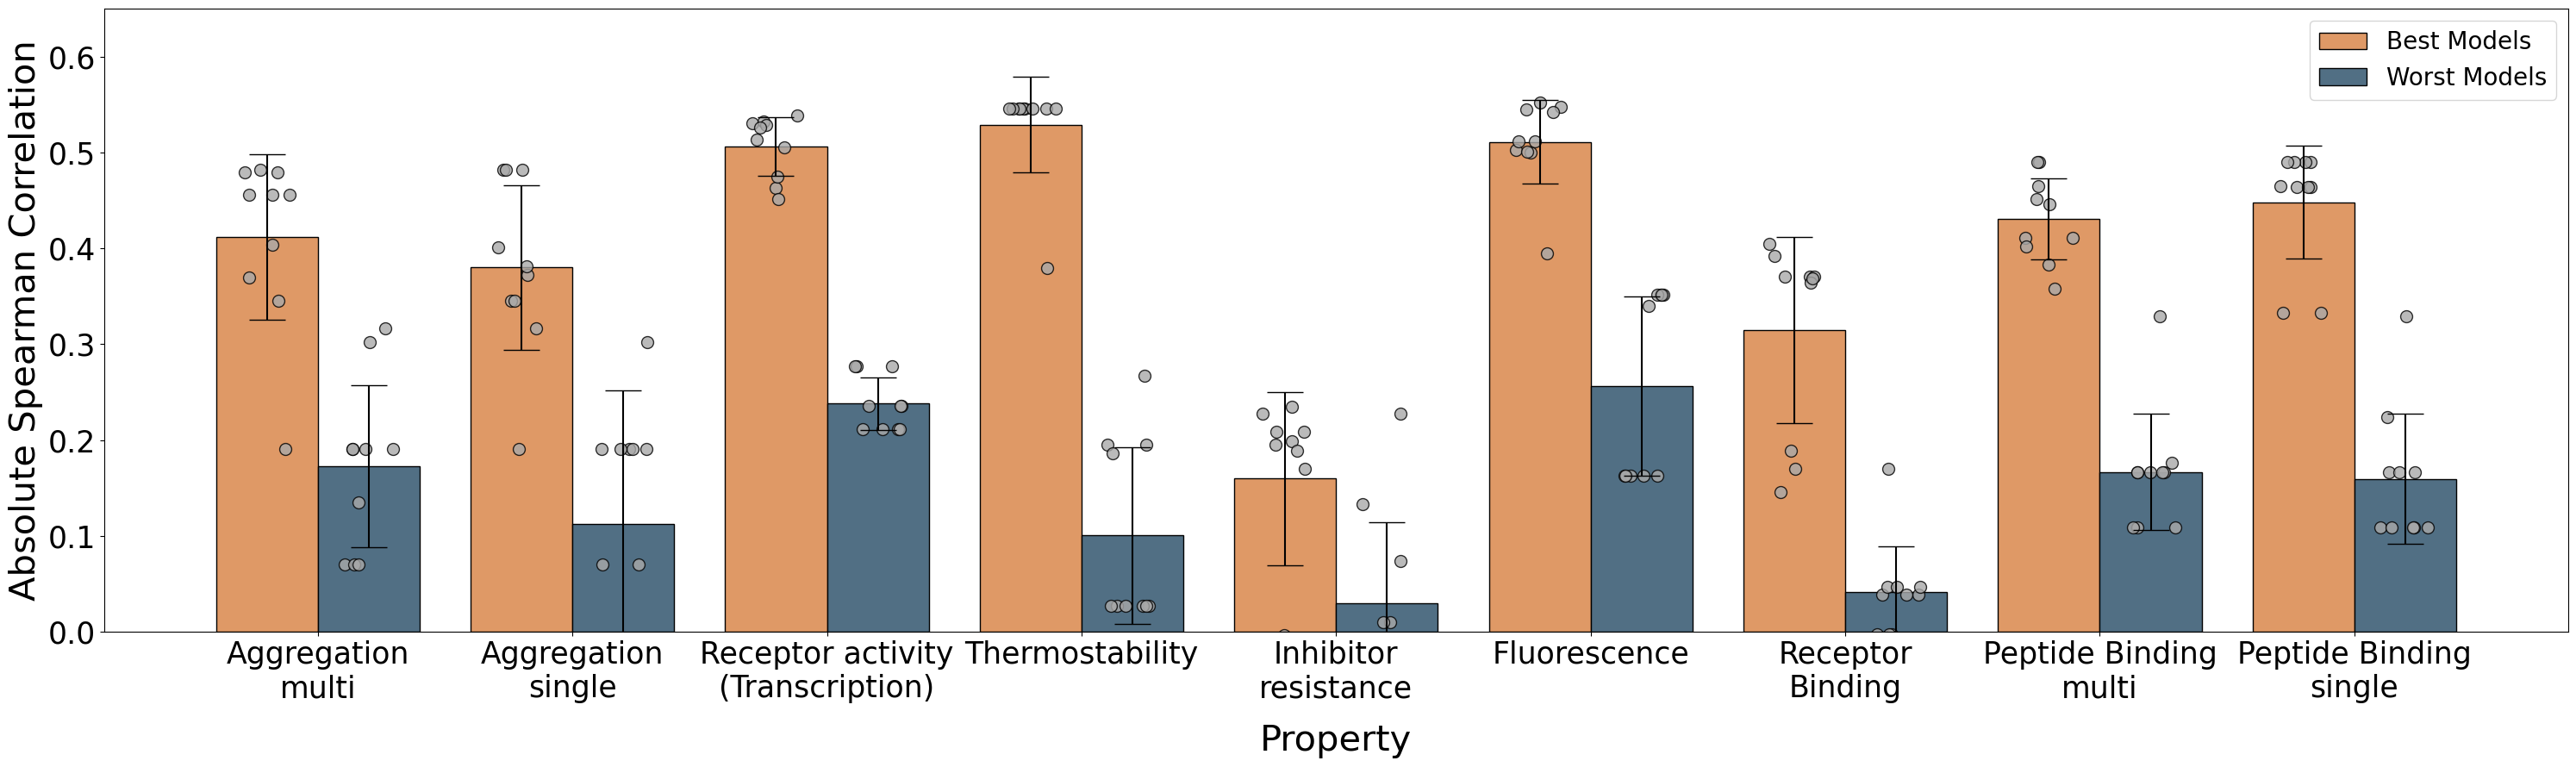

In [29]:
zsmplt.bar_metrics(zsm_module,dataset_names = ['A4_HUMAN_Seuma_2022','A4_HUMAN_Seuma_2022_single','ADRB2_HUMAN_Jones_2020','ESTA_BACSU_Nutschel_2020','MK01_HUMAN_Brenan_2016',
                                               'SC6A4_HUMAN_Young_2021','SPIKE_SARS2_Starr_2020_binding','YAP1_HUMAN_Araya_2012','YAP1_HUMAN_Araya_2012_single'],
                    metric = 'spearmanr',xlabel='Property',ylabel='Absolute Spearman Correlation',
                    alternative_names=['Aggregation\nmulti','Aggregation\nsingle','Receptor activity\n(Transcription)','Thermostability','Inhibitor\nresistance',
                                       'Fluorescence','Receptor\nBinding','Peptide Binding\nmulti','Peptide Binding\nsingle'],
                                       ylimit=0.65, figsize=(30,9), custom_name='diverse_properties')

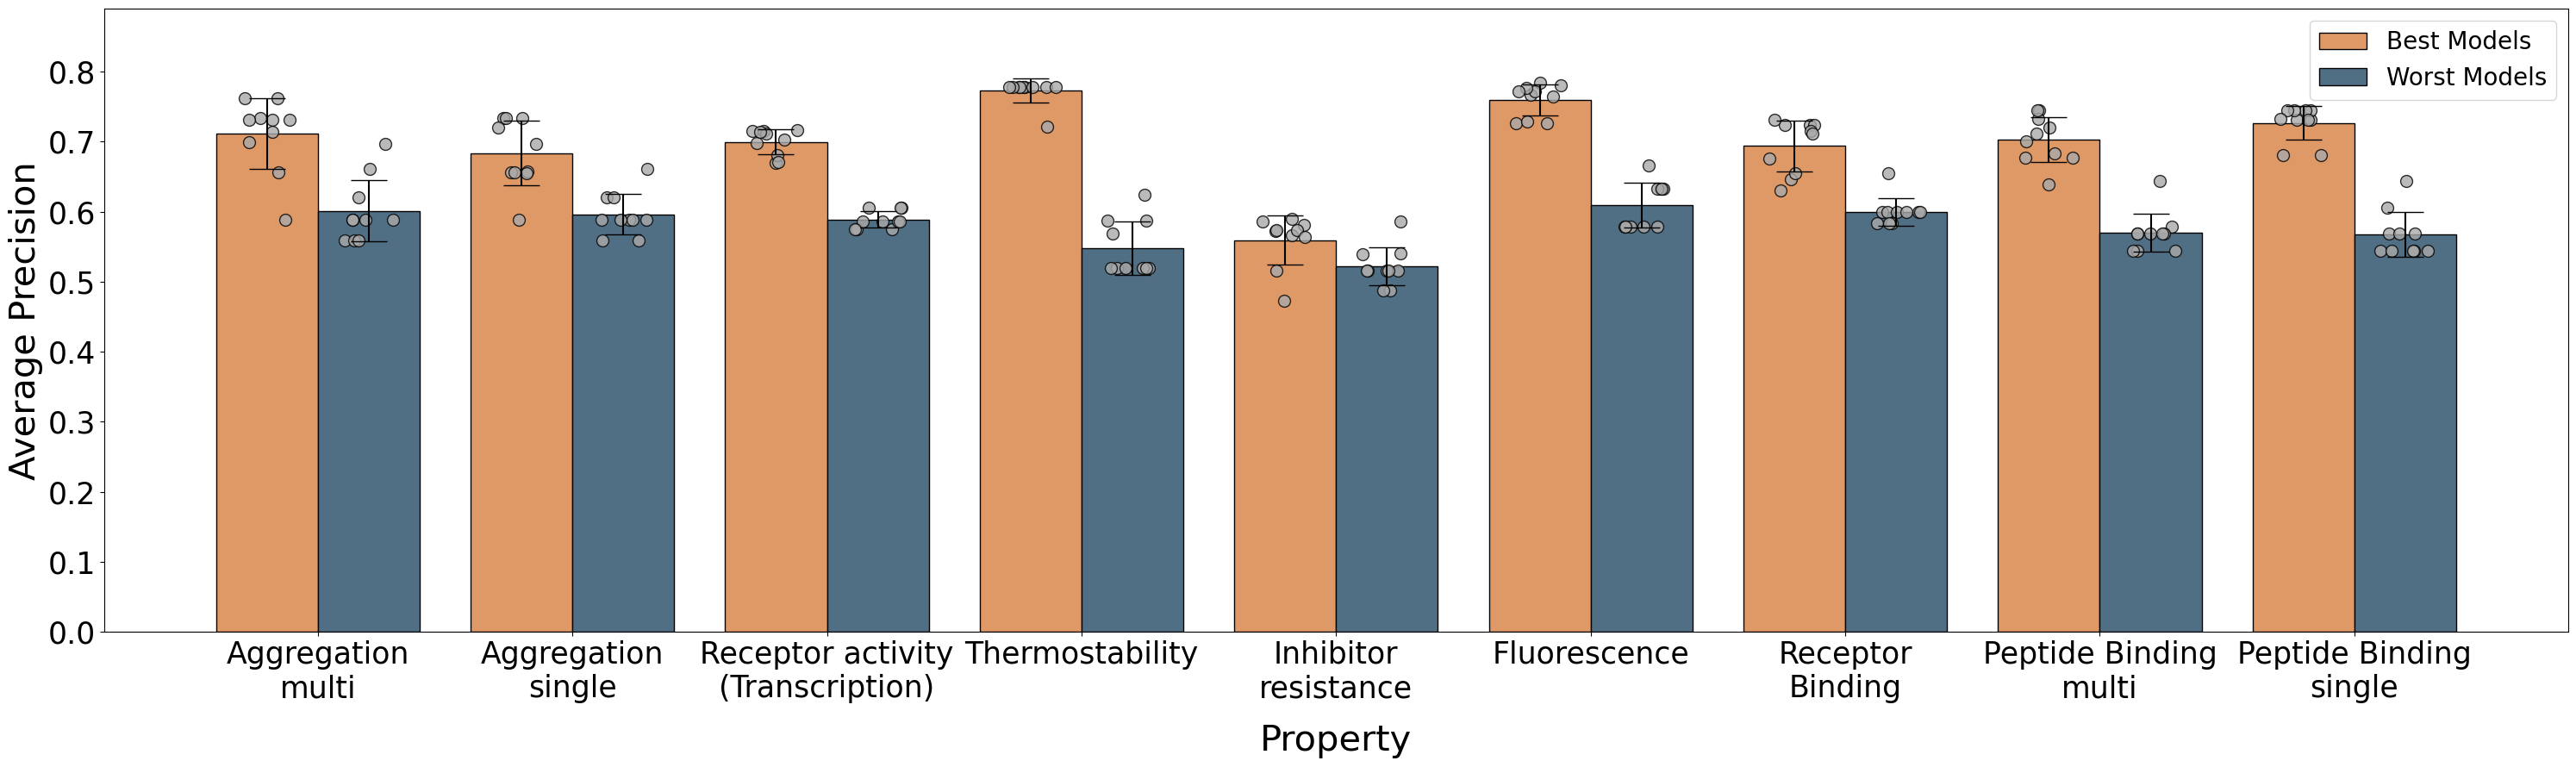

In [30]:
zsmplt.bar_metrics(zsm_module,dataset_names = ['A4_HUMAN_Seuma_2022','A4_HUMAN_Seuma_2022_single','ADRB2_HUMAN_Jones_2020','ESTA_BACSU_Nutschel_2020','MK01_HUMAN_Brenan_2016',
                                               'SC6A4_HUMAN_Young_2021','SPIKE_SARS2_Starr_2020_binding','YAP1_HUMAN_Araya_2012','YAP1_HUMAN_Araya_2012_single'],
                    metric = 'average_precision',xlabel='Property',ylabel='Average Precision',
                    alternative_names=['Aggregation\nmulti','Aggregation\nsingle','Receptor activity\n(Transcription)','Thermostability','Inhibitor\nresistance',
                                       'Fluorescence','Receptor\nBinding','Peptide Binding\nmulti','Peptide Binding\nsingle'],
                                       ylimit=0.89, figsize=(30,9), custom_name='diverse_properties',format='svg')

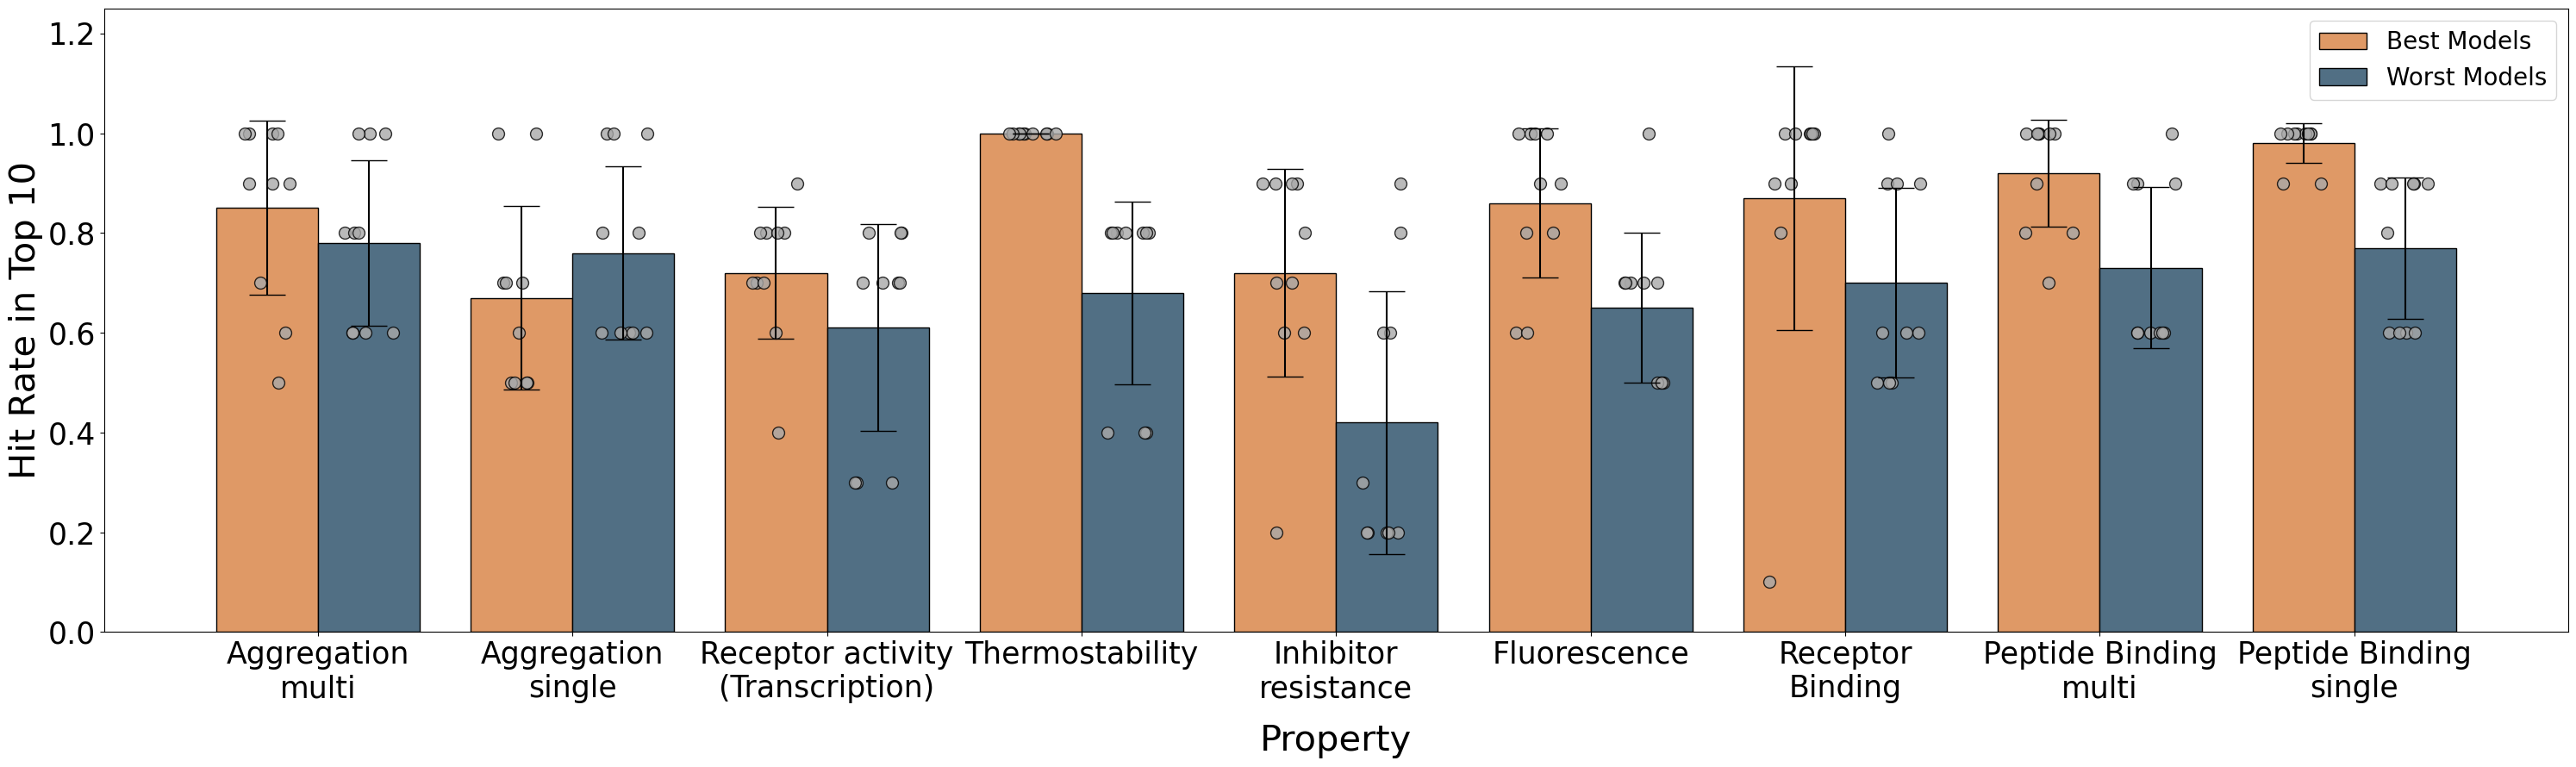

In [31]:
zsmplt.bar_metrics(zsm_module,dataset_names = ['A4_HUMAN_Seuma_2022','A4_HUMAN_Seuma_2022_single','ADRB2_HUMAN_Jones_2020','ESTA_BACSU_Nutschel_2020','MK01_HUMAN_Brenan_2016',
                                               'SC6A4_HUMAN_Young_2021','SPIKE_SARS2_Starr_2020_binding','YAP1_HUMAN_Araya_2012','YAP1_HUMAN_Araya_2012_single'],
                    metric = 'hit_rate',xlabel='Property',ylabel='Hit Rate in Top 10',
                    alternative_names=['Aggregation\nmulti','Aggregation\nsingle','Receptor activity\n(Transcription)','Thermostability','Inhibitor\nresistance',
                                       'Fluorescence','Receptor\nBinding','Peptide Binding\nmulti','Peptide Binding\nsingle'],
                                       ylimit=1.25, figsize=(30,9), custom_name='diverse_properties')

## Model Heatmap

In [32]:
n_models = len(model_list)
best_model_mat = np.zeros((9,len(model_list)))
worst_model_mat = np.zeros((9,len(model_list)))
for n, dataset_name in enumerate(['A4_HUMAN_Seuma_2022_selection','A4_HUMAN_Seuma_2022_single_selection','ADRB2_HUMAN_Jones_2020_selection','ESTA_BACSU_Nutschel_2020_selection','MK01_HUMAN_Brenan_2016_selection','SC6A4_HUMAN_Young_2021_selection','SPIKE_SARS2_Starr_2020_binding_selection','YAP1_HUMAN_Araya_2012_selection','YAP1_HUMAN_Araya_2012_single_selection']):
    for i, model in enumerate(model_list):
        for ite in range(10):
            best_ = zsm_module.best_models[dataset_name][f'ite{ite}']['overall']
            worst_ = zsm_module.worst_models[dataset_name][f'ite{ite}']['overall']
            if model == 'Trancept_no_ret':
                if 'Tranception_no_ret' in best_:
                    best_model_mat[n][i] += 1
                if 'Tranception_no_ret' in worst_:
                    worst_model_mat[n][i] += 1
            else:
                if model in best_:
                    best_model_mat[n][i] += 1
                if model in worst_:
                    worst_model_mat[n][i] += 1

In [33]:
print('Best Overall Models')
for dataset_name in ['A4_HUMAN_Seuma_2022','A4_HUMAN_Seuma_2022_single','ADRB2_HUMAN_Jones_2020','ESTA_BACSU_Nutschel_2020','MK01_HUMAN_Brenan_2016',
                                               'SC6A4_HUMAN_Young_2021','SPIKE_SARS2_Starr_2020_binding','YAP1_HUMAN_Araya_2012','YAP1_HUMAN_Araya_2012_single']:
    print(dataset_name)
    print(' ',zsm_module.best_models[dataset_name]['overall'])

Best Overall Models
A4_HUMAN_Seuma_2022
  ESM2_3B
A4_HUMAN_Seuma_2022_single
  ESM2_3B
ADRB2_HUMAN_Jones_2020
  ESM1b
ESTA_BACSU_Nutschel_2020
  ESM-IF1
MK01_HUMAN_Brenan_2016
  EVE
SC6A4_HUMAN_Young_2021
  TranceptEVE_M
SPIKE_SARS2_Starr_2020_binding
  Progen2_small
YAP1_HUMAN_Araya_2012
  EVE
YAP1_HUMAN_Araya_2012_single
  EVE


In [34]:
print('Worst Overall Models')
for dataset_name in ['A4_HUMAN_Seuma_2022','A4_HUMAN_Seuma_2022_single','ADRB2_HUMAN_Jones_2020','ESTA_BACSU_Nutschel_2020','MK01_HUMAN_Brenan_2016',
                                               'SC6A4_HUMAN_Young_2021','SPIKE_SARS2_Starr_2020_binding','YAP1_HUMAN_Araya_2012','YAP1_HUMAN_Araya_2012_single']:
    print(dataset_name)
    print(' ',zsm_module.worst_models[dataset_name]['overall'])

Worst Overall Models
A4_HUMAN_Seuma_2022
  ProteinMPNN
A4_HUMAN_Seuma_2022_single
  eUniRep
ADRB2_HUMAN_Jones_2020
  ProteinMPNN
ESTA_BACSU_Nutschel_2020
  ProtGPT2
MK01_HUMAN_Brenan_2016
  ProteinMPNN
SC6A4_HUMAN_Young_2021
  ProteinMPNN
SPIKE_SARS2_Starr_2020_binding
  ESM1b
YAP1_HUMAN_Araya_2012
  ProtGPT2
YAP1_HUMAN_Araya_2012_single
  ProtGPT2


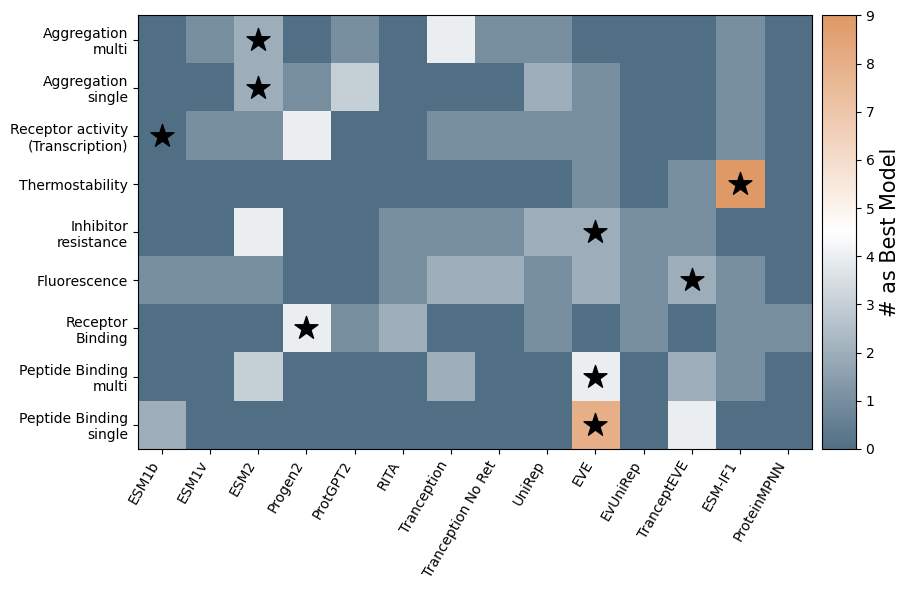

In [35]:
# Initialize the figure and plot the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.matshow(best_model_mat, cmap=cmap)

# Set tick parameters
ax.set_xticks(range(n_models))
ax.set_xticklabels(['ESM1b',
 'ESM1v',
 'ESM2',
 'Progen2',
 'ProtGPT2',
 'RITA',
 'Tranception',
 'Tranception No Ret',
 'UniRep',
 'EVE',
 'EvUniRep',
 'TranceptEVE',
 'ESM-IF1',
 'ProteinMPNN'], rotation=60, fontsize=10, ha='right')
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
ax.set_yticks(range(9))
ax.set_yticklabels(['Aggregation\nmulti','Aggregation\nsingle','Receptor activity\n(Transcription)','Thermostability','Inhibitor\nresistance',
                                       'Fluorescence','Receptor\nBinding','Peptide Binding\nmulti','Peptide Binding\nsingle'], fontsize=10)

# Create a colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('# as Best Model', fontsize=15)

# Add scatter points for best models for entire DMS dataset
scatter_x = [2, 2, 0, 12, 9, 11, 3, 9, 9]
scatter_y = [0, 1, 2, 3, 4, 5, 6, 7, 8]
ax.scatter(scatter_x, scatter_y, color='k', marker='*', s=300, label="Best Models")

plt.tight_layout()
plt.show()

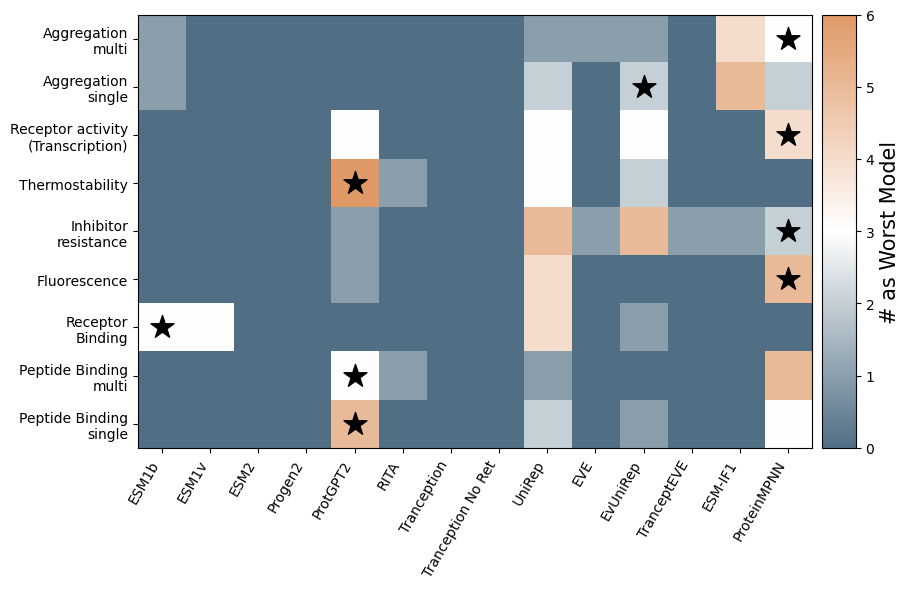

In [36]:
# Initialize the figure and plot the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.matshow(worst_model_mat, cmap=cmap)

# Set tick parameters
ax.set_xticks(range(n_models))
ax.set_xticklabels(['ESM1b',
 'ESM1v',
 'ESM2',
 'Progen2',
 'ProtGPT2',
 'RITA',
 'Tranception',
 'Tranception No Ret',
 'UniRep',
 'EVE',
 'EvUniRep',
 'TranceptEVE',
 'ESM-IF1',
 'ProteinMPNN'], rotation=60, fontsize=10, ha='right')
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
ax.set_yticks(range(9))
ax.set_yticklabels(['Aggregation\nmulti','Aggregation\nsingle','Receptor activity\n(Transcription)','Thermostability','Inhibitor\nresistance',
                                       'Fluorescence','Receptor\nBinding','Peptide Binding\nmulti','Peptide Binding\nsingle'], fontsize=10)

# Create a colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('# as Worst Model', fontsize=15)

# Add scatter points for best models for entire DMS dataset
scatter_x = [13,10,13,4,13,13,0,4,4]
scatter_y = [0, 1, 2, 3, 4, 5, 6, 7, 8]
ax.scatter(scatter_x, scatter_y, color='k', marker='*', s=300, label="Best Models")

plt.tight_layout()
plt.show()

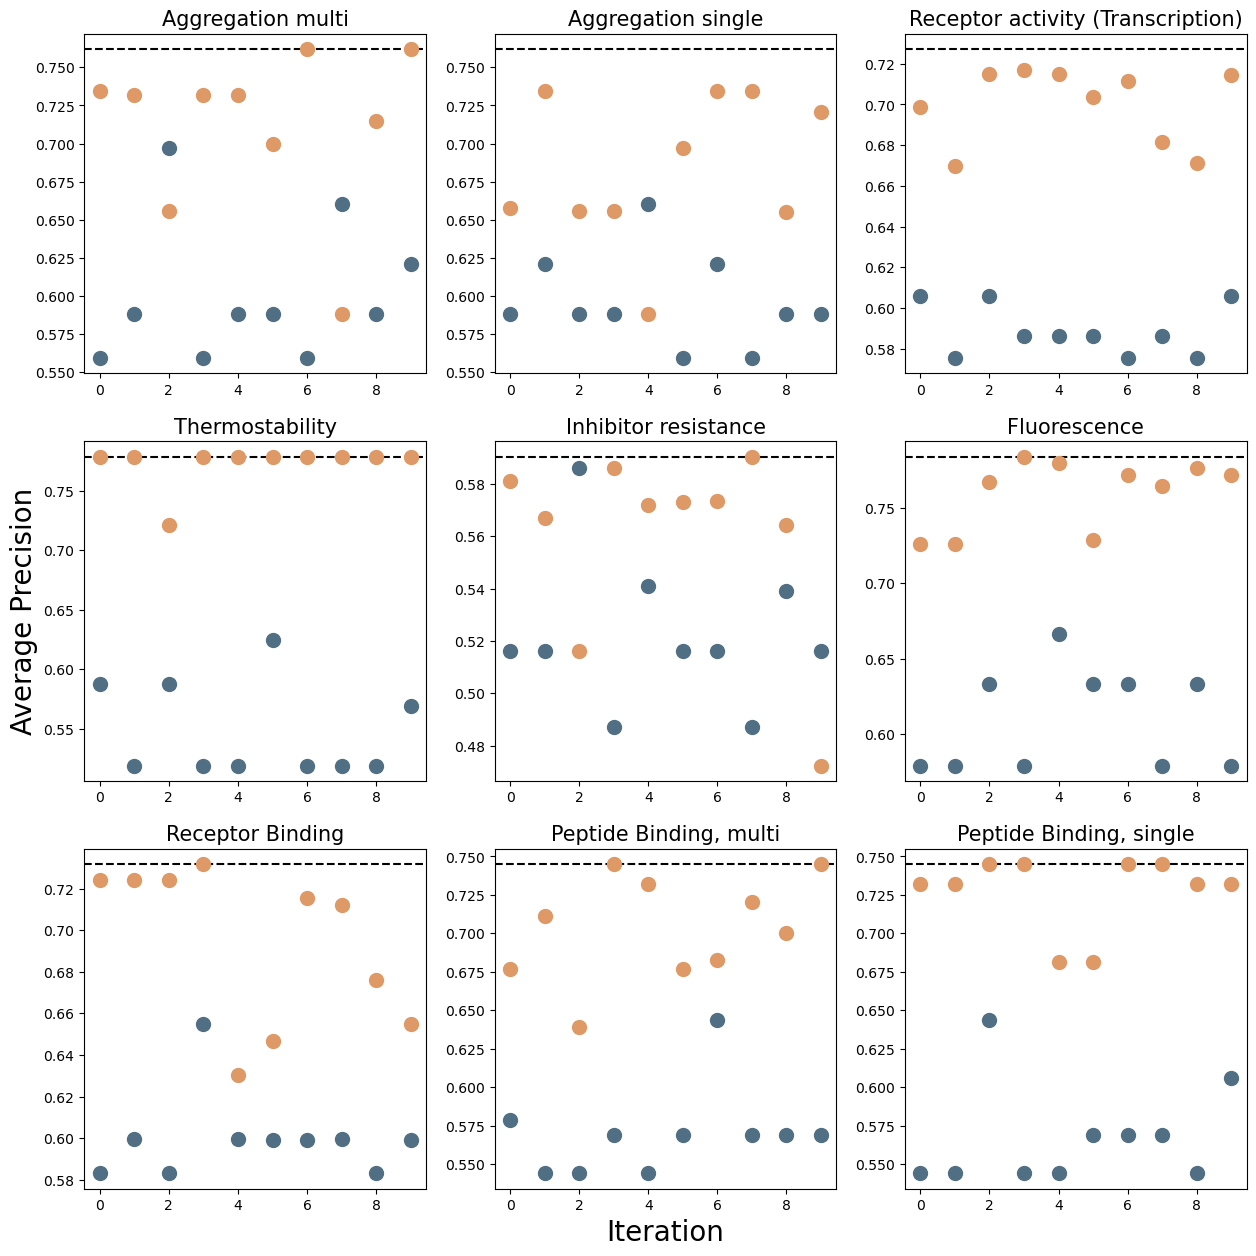

In [37]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(15, 15))
for ax,name,title in zip(axes.flatten(),['A4_HUMAN_Seuma_2022','A4_HUMAN_Seuma_2022_single','ADRB2_HUMAN_Jones_2020','ESTA_BACSU_Nutschel_2020','MK01_HUMAN_Brenan_2016',
                                               'SC6A4_HUMAN_Young_2021','SPIKE_SARS2_Starr_2020_binding','YAP1_HUMAN_Araya_2012','YAP1_HUMAN_Araya_2012_single'],
                                               ['Aggregation multi','Aggregation single','Receptor activity (Transcription)','Thermostability','Inhibitor resistance',
                                       'Fluorescence','Receptor Binding','Peptide Binding, multi','Peptide Binding, single']):
    ax.set_title(title,fontsize=15)
    best_m_full = zsm_module.best_models[name]['overall']
    ax.axhline(zsm_module.metric_results[name]['average_precision']['avg'][best_m_full], color='k', linestyle='--')
    for i in range(10):
        best_m = zsm_module.best_models[name+'_selection'][f'ite{i}']['overall']
        worst_m = zsm_module.worst_models[name+'_selection'][f'ite{i}']['overall']
        best_met = zsm_module.metric_results[name]['average_precision']['avg'][best_m]
        best_met_std = zsm_module.metric_results[name]['average_precision']['std'][best_m]
        worst_met = zsm_module.metric_results[name]['average_precision']['avg'][worst_m]
        worst_met_std = zsm_module.metric_results[name]['average_precision']['std'][worst_m]
        ax.errorbar(i, best_met, yerr=best_met_std, fmt='o', color=best_color,capsize=5,markersize=10)
        ax.errorbar(i, worst_met, yerr=worst_met_std, fmt='o', color=worst_color,capsize=5,markersize=10)
axes[2,1].set_xlabel('Iteration', fontsize = 20)
axes[1,0].set_ylabel('Average Precision', fontsize = 20)

plt.show()

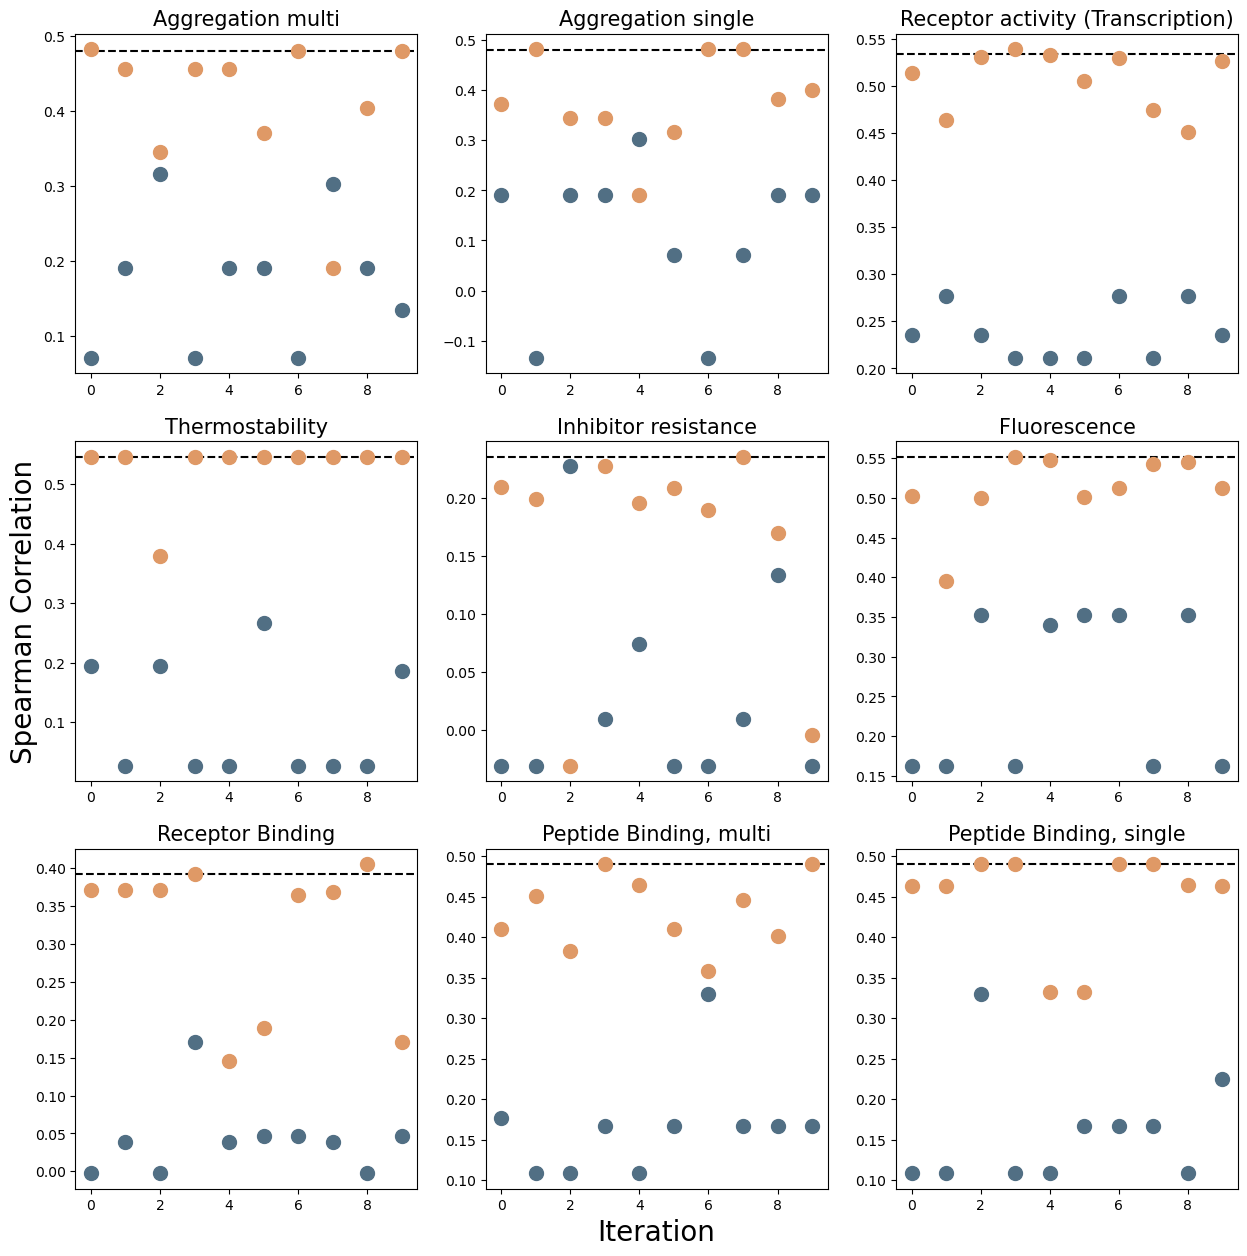

In [38]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(15, 15))
for ax,name,title in zip(axes.flatten(),['A4_HUMAN_Seuma_2022','A4_HUMAN_Seuma_2022_single','ADRB2_HUMAN_Jones_2020','ESTA_BACSU_Nutschel_2020','MK01_HUMAN_Brenan_2016',
                                               'SC6A4_HUMAN_Young_2021','SPIKE_SARS2_Starr_2020_binding','YAP1_HUMAN_Araya_2012','YAP1_HUMAN_Araya_2012_single'],
                                               ['Aggregation multi','Aggregation single','Receptor activity (Transcription)','Thermostability','Inhibitor resistance',
                                       'Fluorescence','Receptor Binding','Peptide Binding, multi','Peptide Binding, single']):
    ax.set_title(title,fontsize=15)
    best_m_full = zsm_module.best_models[name]['overall']
    ax.axhline(zsm_module.metric_results[name]['spearmanr']['avg'][best_m_full], color='k', linestyle='--')
    for i in range(10):
        best_m = zsm_module.best_models[name+'_selection'][f'ite{i}']['overall']
        worst_m = zsm_module.worst_models[name+'_selection'][f'ite{i}']['overall']
        best_met = zsm_module.metric_results[name]['spearmanr']['avg'][best_m]
        best_met_std = zsm_module.metric_results[name]['spearmanr']['std'][best_m]
        worst_met = zsm_module.metric_results[name]['spearmanr']['avg'][worst_m]
        worst_met_std = zsm_module.metric_results[name]['spearmanr']['std'][worst_m]
        ax.errorbar(i, best_met, yerr=best_met_std, fmt='o', color=best_color,capsize=5,markersize=10)
        ax.errorbar(i, worst_met, yerr=worst_met_std, fmt='o', color=worst_color,capsize=5,markersize=10)
axes[2,1].set_xlabel('Iteration', fontsize = 20)
axes[1,0].set_ylabel('Spearman Correlation', fontsize = 20)

plt.show()